# Chapter 2: End-to-End Machine Learning Project
The main steps of data scientistry:
1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights
4. Prepare the data for ML algorithms
5. Select a model and train it
6. Fine tune your model (hyperparameters)
7. Present solution
8. Launch, monitor, maintain

In this chapter we use 1990 California Housing data from the census; it is good for learning.

## Look at the Big Picture
This data has metrics for each district in California (in 1990).

The model should look to predict the median housing price of any district given the other metrics (features like population, median income, etc).

## Frame the Problem
Question 1:
How do we expect to use the model?

We dont just create a model, make predictions, and be done. We create a model for some reason. This is important because it can help determine what algorithms we select (Random Forest, SGD, etc), and what performance measures we use (Precision, Recall, etc).

Question 2:
What does the current solution look like?

This gives reference performance and insights to solving the problem (don't waste time not knowing what to do).

Question 3:
How do we frame the ML problem?

Do we know the labels? It is a supervised learning task. And so on. We seek to answer questions here like: is it Regression or Classification problem, is it a Supervised learning, Unsupervised, etc.

## Selecting a Performance Measure
Next, we select a performance measure to see how much error the system makes in predictions. Since this is a Regression problem, lets use RMSE.

(see page 43 & 44 in textbook for the notations)
(Finish this part later)

## Check Assumptions
Make a list to verify the assumptions early. What if you spend 1 month working on a Regression system in your job when they really wanted a classification system? Then you're screwed.

## Download the Data
In typical environments the data would probably be in a relational database (use SQL), but in this case just download it from the internet.

What is *crucial* is to **automate data acquisition if the data is constantly being updated or changed; we need to write a small script to fetch data**.

In [1]:
# For various OS functionalities
import os
# for reading tar files
import tarfile
# Library for working with URLs
import urllib.request

# String literals
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
print(DOWNLOAD_ROOT)
HOUSING_PATH = os.path.join("datasets", "housing")
print(HOUSING_PATH)
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
print(HOUSING_URL)

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    '''This function:
    1. '''
    if not os.path.isdir(HOUSING_PATH):
        os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

https://raw.githubusercontent.com/ageron/handson-ml/master/
datasets\housing
https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz


Now write a small function to load the data.

In [2]:
import pandas as pd
import numpy as np

def load_housing_data(housing_path=HOUSING_PATH):
    '''load_housing_data:
    Function loads housing.csv from the housing path and 
    returns the data as a pandas dataframe object'''
    
    # Create the path to find the dataset
    csv_path = os.path.join(housing_path, "housing.csv")
    # Return the DataFrame object
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data() # Loads the housing data as per the function
housing.head()                # Look at the head of the DataFrame obj

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# There are 10 attributes (features)
housing.columns                      # .columns method gets the column names

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
# .info() gives a great description of the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The `.info()` method is important for a quick view on the dataset. 

It gives information like:
- Number of non-nulls for each feature
- Total number of rows, columns
- datatypes of columns

Notice how we interpret the data: If each instance (row) represents a different district, then the `total_bedrooms` column having 20433 non-nulls means that 207 districts are missing data for number of bedrooms.

Notice that all columns are float64s, so all columns are numeric except for `ocean_proximity` which has to be a text type because it was loaded from a csv file; Since `ocean_proximity` is categorical, we should count the values it has.

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# The describe method shows a summary of the numerical features (attributes)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The `.describe()` method is important to get a feel for the data.

Another way to get a feel is to plot a histogram from the whole dataset. The `.hist()` method plots a histogram of all the numerical attributes (features) in the dataset

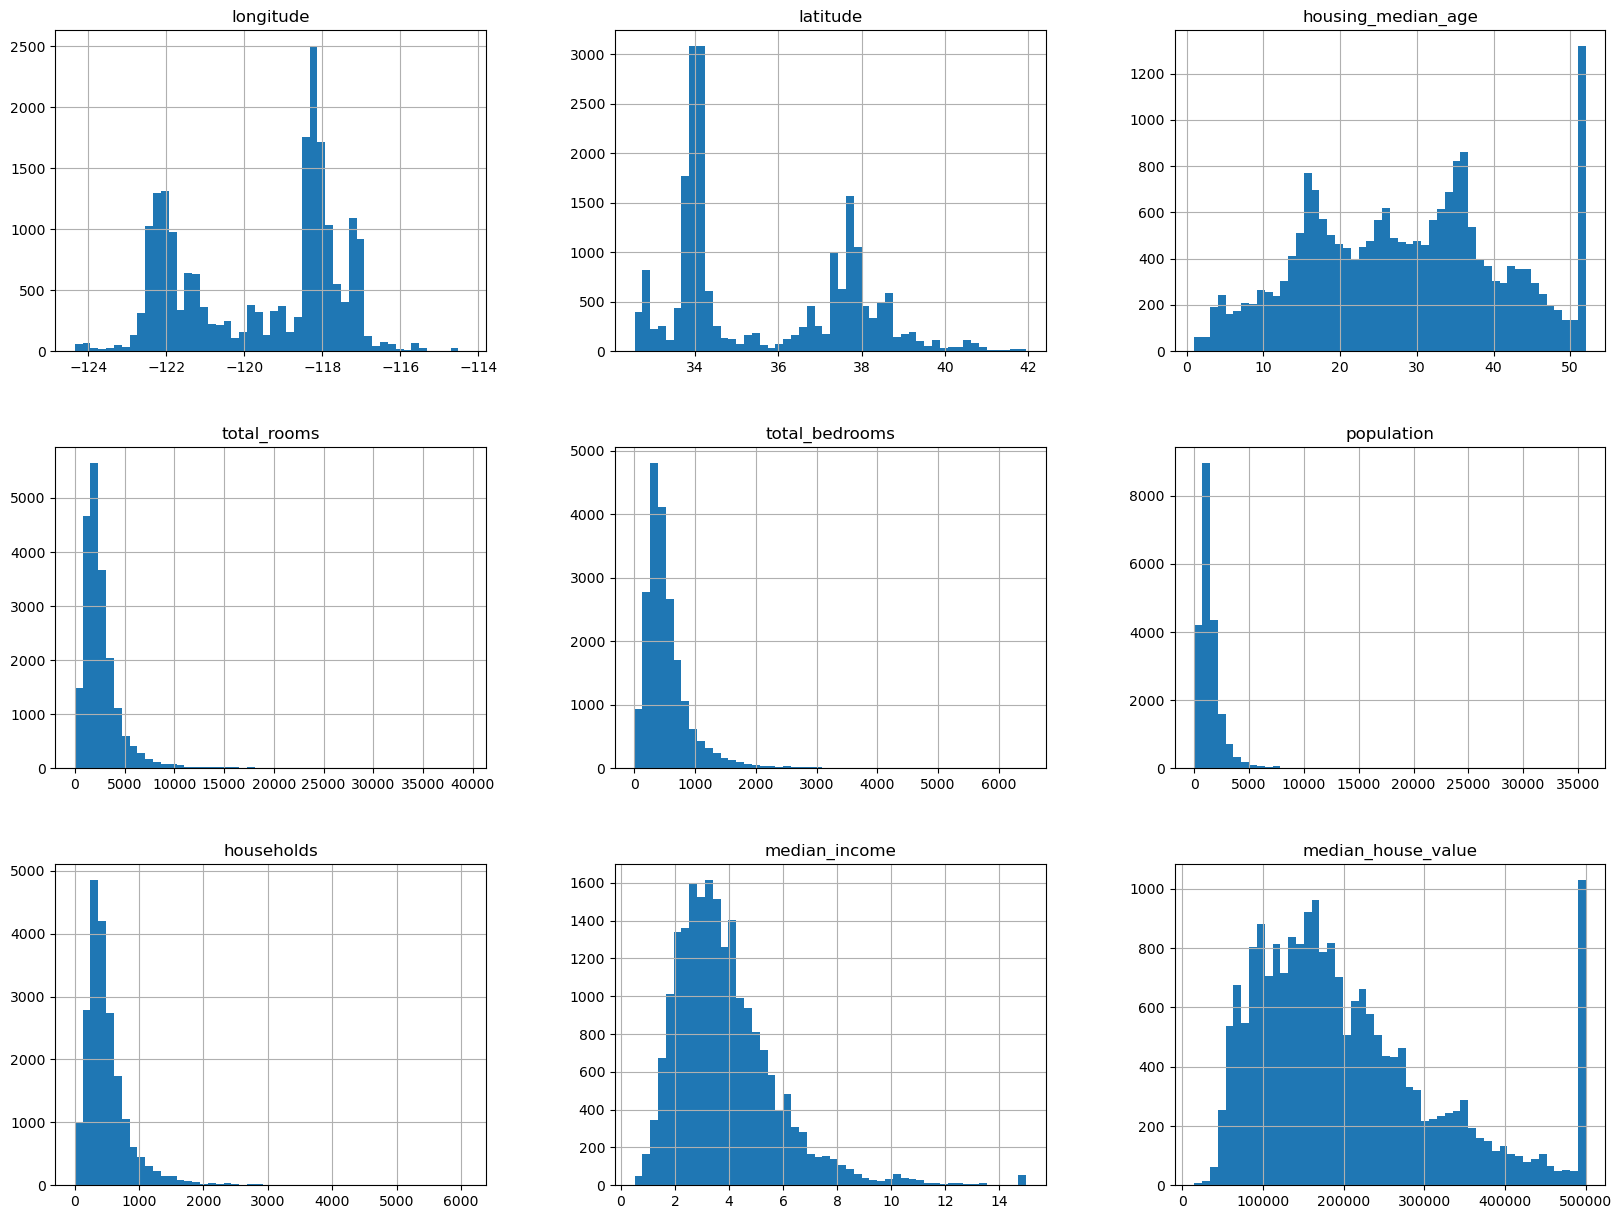

In [8]:
import matplotlib.pyplot as plt

# the hist method plots a histogram of all the numerical attributes (features) in the dataset
housing.hist(bins = 50,figsize = (20,15));

It is important to know what the values of the features (attributes) mean: 

1. The value of median income is only from 0 to 15. The textbook notes this feature was scaled down and represents "10s of thousants of dollars", so a district with median income at 13 is that the median income is $130,000.

2. The median housing age and value were also capped. The median housing value being capped could be a huge problem because the ML algorithm might learn that values do not go past the cap (500k$). 
 - If features were arbitrarily capped, you may want to *collect proper labels for those instances*
 - or remove those districts from the set. These will alleviate the problem.

3. The features have very different scales.

4. The features are not normalized, which causes problems in pattern detection.

**Remark**: As a data scientist, you may work with already preprocessed features.

## Create a Test Set
Create a test set. Usually around 20% of your dataset. Do not look at the test set to avoid making assumptions about what model to use (*snooping bias*).

Note: pgs 54 - 56 in Geron show how to create your own function for splitting into training and testing sets, but I will just use SKlearn.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

When splitting a dataset, we need a **stratified sample** that is representative of the population.

**Def'n.** Stratified Sampling: a population is divided into homogeneous subgroups called *strata*, and the right number of instances is sampled from each stratum to guarantee the test set is representative of the population.

When looking at the histogram of the `median_income`, we see that most of the incomes are between 0 and 6, so we should subdivide the **test set** to be representative of the fact that most of the data are between 0 and 6.

For this, we create a categorical feature that divides the test set:

In [11]:
# Use pd.cut to cut the median income into 5 categories
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

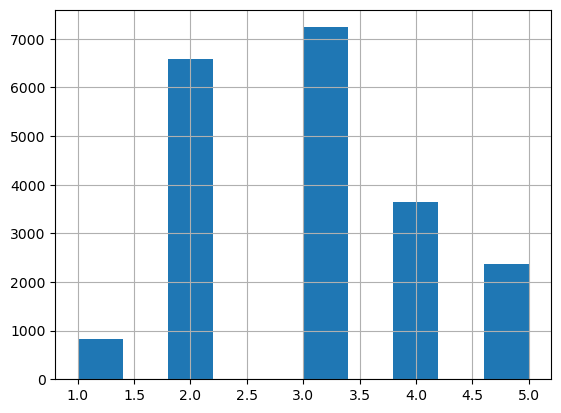

In [12]:
housing["income_cat"].hist();

Now we do *stratified sampling* based on the income category

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [14]:
# split.split will split the housing dataset by the income_cat
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
print(len(strat_train_set))
print(len(strat_test_set))
print(len(train_index))
print(len(test_index))

16512
4128
16512
4128


In [16]:
# the stratified set is representative of the distribution of the data 
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

We need to remove the `income_cat` categorical attribute (feature) that we created so the ML model does not train on it.

In [17]:
# Remove the income_cat attribute (feature)
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize
Recall that we must only look at the training set. Let's create a copy so we don't accidentally harm it while visualizing the data.

In [18]:
housing2 = strat_train_set.copy()

### Visualizing Geographical Data
Since there is geographical data, we can actually plot it to look like the geographic region!

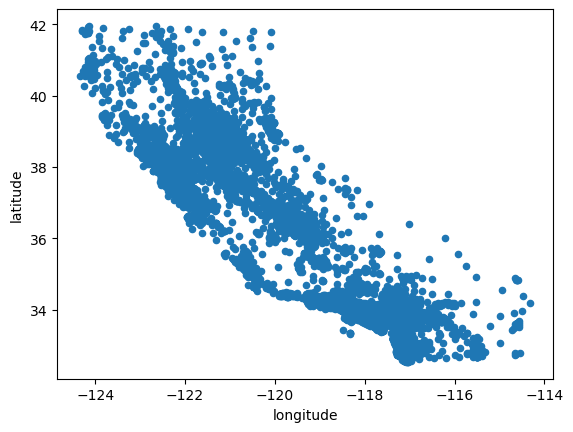

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude"); # Looks like Cali!

Set `alpha = ` to see the highest density of districts.

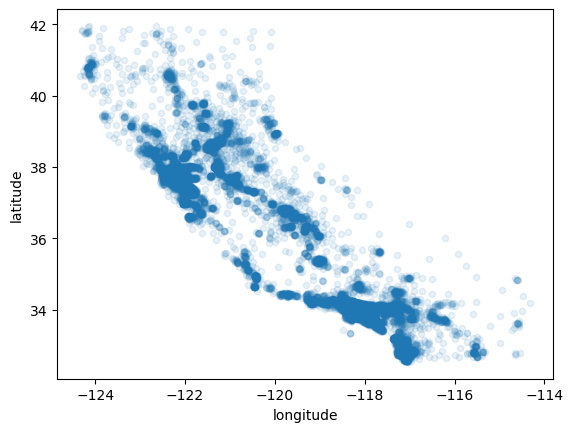

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

We should learn to work with plots to utilize the power in visualization:
 - `s = ` tells how to size the points (size)
 - `c = ` tells how to color the points
 - `cmap=` tells the color scheme
 - `colorbar=` is to plot the colorbar

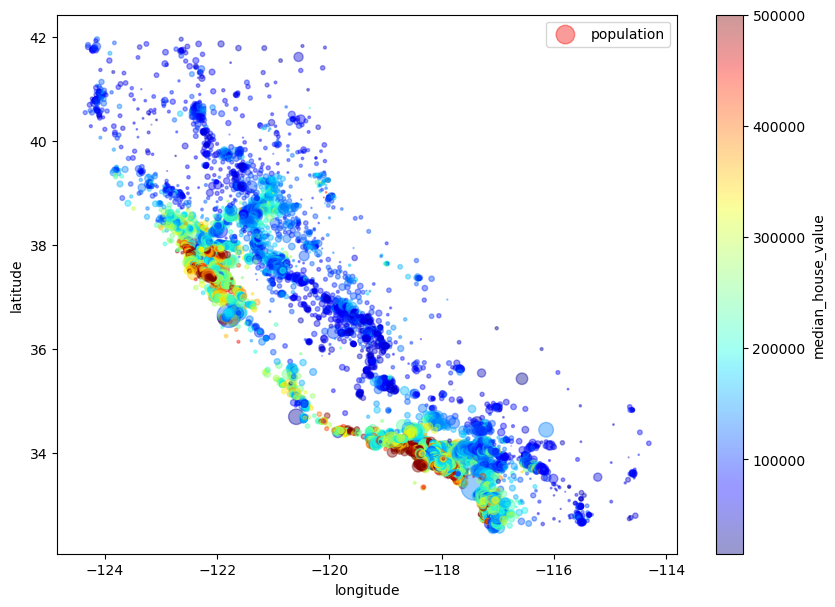

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,);
plt.legend();
# Note that the proximity to the ocean causes an increase in the median house value

### Looking for Correlations
Since there are not a huge amount of attributes (features), we can calculate Pearson's correlation coefficient on all columns.

In [22]:
corr_matrix = housing.corr()                                                      # The entire correlation matrix
corr_matrix['median_house_value'].sort_values(ascending=False)                    # Subset one column

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Another way to get correlations is to check `pandas` correlation ``scatter_matrix``. It plots every feature against every other feature. Since there are 11 numeric columns, it will produce $11^2$ graphs... So let's only plot a few

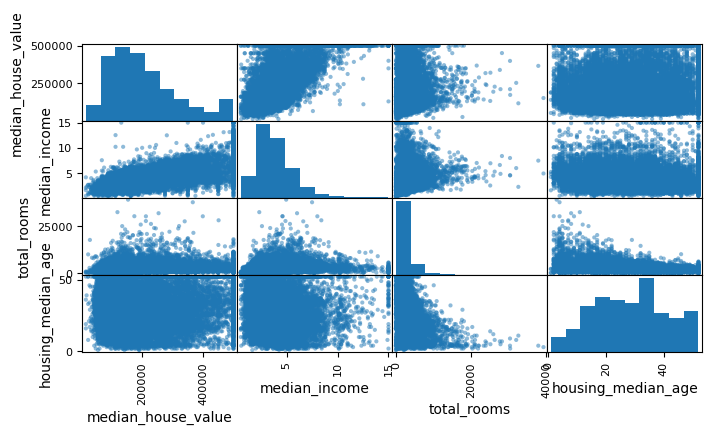

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

scatter_matrix(housing[attributes], figsize=(8, 4));

The main diagonal plots a histogram, which is helpful. From the correlation plot and table, we saw that `median_income` was the best predictor of `median_house_value`; let's plot that exclusively.

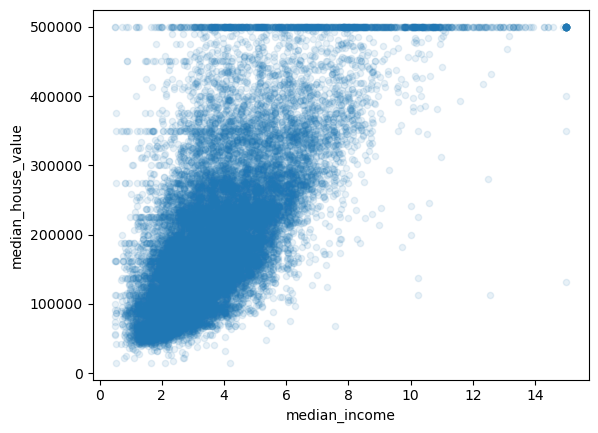

In [24]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1);

Notice the price cap at 500k, also there is another horizontal like at around 350k houseing value. We may consider removing these districts because the ML model may learn them and predict poorly.

### Experimenting with Attribute Combinations
Final preparation step: **try different combinations of features (attributes)**.

Ex: **The total number of rooms and bedrooms for the whole district seems useless. Look at the number of rooms per household, and the number of bedrooms per room (ratio)**. Also, the population per household per district seems interesting.

In [25]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [26]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

The number of `rooms_per_household` is more correlated with the `median_house_value` than the bedrooms or rooms features themselves.

Our data exploration has been decently thorough.

## Prepare the Data for Machine Learning Algorithms
Time to prep the data for the ML algorithms.

We should use functions instead of doing it manually because:
 - "Reproduce transformations easily on any dataset"
 - "Gradually build your own library of functions **for future projects**"
 - "Will be good to have them for building live systems"
 - "Easier to try combinations of transformations"
 
But first we revert to a clean training set, and separate the predictors from the target.

In [27]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning
Most ML algorithms cannot work with missing features, so we must take care of them. 

We saw from the `.info()` method that `total_bedrooms` had missing values; we have 3 options:
1. Get rid of the corresponding districts (instances)
2. Get rid of the whole attribute (feature)
3. Fill the cell with some value (zero, median, mean, etc)

Accomplish these easily using DataFrame’s dropna(), drop(), and fillna() methods:

In [28]:
housing.dropna(subset=["total_bedrooms"])      # option 1
housing.drop("total_bedrooms", axis=1)         # option 2
median = housing["total_bedrooms"].median()    # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

NOTE: *If you choose option 3, you will also need to fill the `na`s in the test set and when the system is live, you will need to fill missing values as they appear.*

SKlearn lets us take care of missing values easily with `SimpleImputer()`, just specify the replacement `strategy`.

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

The median is only computable on numerical attributes, so create a set which only has the numerics.

The only non-numeric is `ocean_proximity`.

In [30]:
# ocean_proximity is not numeric, so we need to remove it to impute the dataset (also copy the dataset).
housing_num = housing.drop("ocean_proximity", axis=1)

# Fit the imputer to the training data (without the character attribute)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

We can see from the imputer's [function] attribute `.statistics_` that it computed the mean for each column and filled the NAs with that value. Computing all statistics (median in this case) even for columns without NAs is good because we do not necessarily know if all instances will be filled by all features using a live system.

In [31]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [32]:
housing_num.median().values # The same as the imputer's statistics

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Now, use the "trained" imputer to transform the training set by replacing the missing values with the learned medians.

In [33]:
X = imputer.transform(housing_num)

Put back into `pandas` `DataFrame` object

In [34]:
# housing_transformed
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### SK Learn Design Principles
- Consistency: All objects share a simple and consistent interface
 - **Estimators**: *Any object that computes estimates based on a dataset*. Performed by a `.fit()` method which only takes a dataset as the argument. For *supervised learning* algorithms, it takes an extra argument of the `labels`. Any other parameter is a hyperparameter
 - **Tranformers**: *Some estimators can also transform a dataset* with the `.transform()` method; it returns the transformed dataset. It also has a `fit_transform()` convenience method.
 - **Predictors**: *Some estimators are capable of making predictions* using a `.predict()` method that takes in [a dataset of] new instances and returns corresponding predictions. It also has a `.score()` method. See Chapter 3 for scoring on classifiers.
- Inspection
 - **All estimator's hyperparameters and parameters are accessible via [function] attributes like imputer`.strategy`, imputer`.statistics_`, etc.**
- Nonproliferation of Classes
 - Datasets are just numpy arrays or scipy sparce matrices. Hyperparameters are just strings or numbers.
- Composition
 - Existing building blocks are reused as much as possible. An example being reusing `pipeline()` containers.
- Sensible defaults
 - parameters/hyperparameters have reasonable defaults

### Handling Text and Categorical Attributes
Recall we left out `ocean_proximity` attribute because it is not numeric. We need to numerically encode it to put it into the ML algorithm; use SK Learn's `OrdinalEncoder` class.

In [35]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [36]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [37]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Actually the **above way of encoding is problematic because it assumes the number 1 is closer to 2 than 3 or 4, etc.** That is okay if we are looking at classifications like "bad", "good", or "excellent", but not okay to assume for geographic regions.

Solution? Use **One-Hot Encoding**, aka creating **dummy variables**, which is to create a single binary attribute (feature) per category.

In [38]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### Custom Transformers
skipped for now, but function necessary for pipeline example

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
                         
                         
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


### Feature Scaling
**One of the most important transformations**. ML algorithms usually do not work well with features that have different scales.

NOTE: "Scaling the target values is generally not required."

Two common ways:
1. **Min-max scaling (normalization)**
 - Values are shifted & scaled to between 0 and 1.
 - Do this by subtracting the min value, then divide my max minus min; $min/(max-min)$
 - Or use SK Learn `MinMaxScaler()`
2. **Standardization**
 - Think z-score std'zation
 - not bounded by 0 or 1 or any particular range (problematic for Neural Networks)
 - much less affected by outliers
 - SK Learn `StandardScaler()`
 
Remark: Important to fit scalers to training data only.

### Transformation Pipelines
Data must be transformed in the right order. Pipelines are good to help visualize sequences of transformations.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

the `Pipeline([ ])` takes a sequence of name-estimator pairs and defines a sequence of steps.

Requirements
- **All estimators before the last must have a `.fit_transform()` method**.
- Names must be unique and not contain double underscores (__).

Calling the Pipeline's `.fit()` calls `.fit_transform` on the estimators until the last, where it just calls `.fit()`.

We have worked with numerics and categories separately, but we can use a pipeline function that works with them together. Here we have an example of transforming numerics and categories at the same time in a single pipeline.

In [41]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [42]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.466353,-0.092580,-0.443846,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.050362,0.023024,-0.516065,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.509240,-0.037436,0.322869,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,0.328149,-0.059156,-0.457023,1.0,0.0,0.0,0.0,0.0


Instead of the `Pipeline()`, we use `ColumnTransformer()` which requires a list of tuples with a name, the transformer (can be a premade pipeline like `num_pipeline`), and a list of columns. Then we fit the whole dataset to it.

## Select and Train a Model
### Training and Evaluation on the Training Set
After all we've done, this part is fairly simple.

Let's train on a LinearRegression model.

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

We call a LinearRegression model, then fit the prepared data from the pipeline and the labels.

In [50]:
some_data = housing.iloc[:5] # Housing was converted to the stratified_train_set
some_labels = housing_labels.iloc[:5] # Corresponds to the same indices as the stratified_train_set
some_data_prepared = full_pipeline.transform(some_data) # Transform the pulled data from stratified_train_set
print("Predictions:", lin_reg.predict(some_data_prepared)) # Predict using out fitted model
print("Labels:", list(some_labels)) # These are the actual values

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


This worked but it's not very accurate. Let's look at the measurement of error on the whole training set

In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared) # Seeing the predictions of the actual data we trained on
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

A typical prediction error of ~68,000 dollars is bad.

The main ways to alleviate underfitting are:
 - Selecting a different model
 - feeding better features to the training algorithm
 - Reducing constraints (not applicable here)
 
We already looked at feature combinations, so let's look at another training algorithm, the decision tree.

In [52]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [53]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

So the model was underfit, now we get no errors? The model must be overfit.

### Better Evaluation Using Cross Validation (k fold)
A *great alternative to `train_test_split` is*  **K-fold Cross Validation**. 

**Def'n** K-Fold Cross Validation: Sklearn capability that randomly splits the data into 'k' subsets called folds and *trains and evaluates your model k times*. For example, if we use 10 folds (subsets), we train the algorithm on 9 subsets and validate on 1, and we do that for all 10 subsets. It returns k evaluation subsets.

The function that performs k-fold CV is called `cross_val_score`. It takes in:
- a training algorithm
- dataset
- labels for predictions
- a scoring method
- number of folds

In [55]:
from sklearn.model_selection import cross_val_score # Importing kfold CV
scores = cross_val_score(tree_reg, housing_prepared, 
                         housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

array([72855.34923246, 71154.26231137, 68821.37055883, 70883.02798878,
       69402.05410527, 77405.39351087, 72493.34064396, 74080.77975627,
       68747.45373696, 72529.74706953])

In [56]:
tree_rmse_scores

array([72855.34923246, 71154.26231137, 68821.37055883, 70883.02798878,
       69402.05410527, 77405.39351087, 72493.34064396, 74080.77975627,
       68747.45373696, 72529.74706953])

NOTE: **Cross validation features expect a utility function, not a cost function**

For utility functions, higher is better. For cost functions, lower is better.

Above, `scores` is computing the negative mean squared error, and we cannot sqrt negative values, so that's why there is a negative in the `tree_rmse_scores` line.

We can create a function to look at the scores.

In [58]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [72855.34923246 71154.26231137 68821.37055883 70883.02798878
 69402.05410527 77405.39351087 72493.34064396 74080.77975627
 68747.45373696 72529.74706953]
Mean: 71837.2778914312
Standard deviation: 2528.512244674389


Look at that, the error is actually worse than the linear regression model!

The cross validation function also gives a standard deviation for the error estimate, which is good.

Let's perform k-fold cross validation on the linear regression model, now.

In [59]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818065


We see that the k-fold cross validation on the linear regression algorithm shows that linear regression performs better than the decision tree model. The decision tree algorithm was overfitting so badly that it actually performs worse in k-fold cross validation.

Let's try 1 more model, the Random Forest. Random Forest is an **Ensemble Learning** algorithm. It is ensemble because it is built on top of multiple other models - random forest is built on decision trees.

In [64]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18771.58924757679

In [63]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51627.43452511 48899.39054445 46723.44714072 52186.32687118
 47298.40018492 51624.80892795 52524.89866593 49697.40336665
 48404.65952013 54183.62842615]
Mean: 50317.03981731918
Standard deviation: 2341.4471452618686


Random Forest is **much better than the other algorithms** for this dataset, but note that the validation scores are much larger than the original rmse, therefore the *model is still overfitting the dataset*.

Soltions are:
 - constrain (regularize) model
 - get a lot more data
 
Save every model you expirement with. Save the hyperparameters, parameters, CV scores, and actual predictions as such:

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(my_model, "my_model.pkl")
# # and later...
# my_model_loaded = joblib.load("my_model.pkl")

## Fine-Tune Your Model
Assuming we made a shortlist of promising models, we need to fine-tune the hyperparameters

### Grid Search
Tweaking hyperparameters manually is tedious, and it is nearly impossible to explore so many possible combinations. SK learn has a function called `GridSearchCV` - all you do is tell it which parameters to experiment with and it evaluates all possible combinations.

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, # Grid search
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels) # Initialize the grid search, then fit the data.

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

When you don't know which values to use for searching your hyperparameters, use powers of 10 or smaller numbers.

The `param_grid` list is telling `grid_search` to first find the best combinations from all possible combinations of the first dictionary before looking at the second dictionary. Note, the second dictionary also sets `'bootstrap'` to `False`, when it is `True` by default.

The grid search for the Random Forest ends up evaluating (3x4) + (2x3) = 18 possible combinations of hyperparameters. Since we have 5 folds, it does (18x5) = 90 rounds of training hyperparameters.

After we are done `GridSearchCV()`ing, we can inspect the best hyperparameters:

In [66]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

**Note, since 8 and 30 were the maximum values in our search, we should further the search to see if we can do better**

In [67]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

We can also find the eval scores at all iterations as such:

In [68]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63540.23953522314 {'max_features': 2, 'n_estimators': 3}
55562.52918722284 {'max_features': 2, 'n_estimators': 10}
52763.16105796836 {'max_features': 2, 'n_estimators': 30}
60270.36543804357 {'max_features': 4, 'n_estimators': 3}
52458.152431182156 {'max_features': 4, 'n_estimators': 10}
50443.52790107825 {'max_features': 4, 'n_estimators': 30}
59357.50562155948 {'max_features': 6, 'n_estimators': 3}
52125.537370263475 {'max_features': 6, 'n_estimators': 10}
50126.43214529311 {'max_features': 6, 'n_estimators': 30}
59480.47231404981 {'max_features': 8, 'n_estimators': 3}
52187.77211363403 {'max_features': 8, 'n_estimators': 10}
49974.867672773165 {'max_features': 8, 'n_estimators': 30}
61318.268742277156 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53737.64037147275 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58975.53130956112 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52707.388533369405 {'bootstrap': False, 'max_features': 3, 'n_estimators

Recall the `CombinedAttributesAdder` custom transformer: that transformer can be fed into a `GridSearchCV()` as a hyperparameter to see if using the `add_bedrooms_per_room` hyperparameter makes the model better or not. This is very powerful. `GridSearchCV()` similarly can help handle outliers, missing features, feature selection, etc.

### Randomized Search
When the hyperparameter search space is large, `RandomizedSearchCV` is preferrable to `GridSearchCV`. It is fit similarly to the grid search.

Pros:
 - Let the randomized search run for as many iterations as you want to find the best hyperparameters.
 - More control over computing budget.
 
 
### Ensemble Methods
Another way to fine-tune models is to make a group of a training algorithm, also called an ensemble. The group (ensemble) performs better than the individual. Recall, Random Forests are an ensemble of Decision Trees. This is discussed more in Chapter 7.


### Analyze the Best Models and Their Errors
**Inspecting the models gives good insights on the problems**

Ex: The RandomForestRegressor indicates the importance of each features:

In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.19524414e-02, 6.23954762e-02, 4.20360077e-02, 1.51773252e-02,
       1.48127679e-02, 1.43817726e-02, 1.45555726e-02, 3.74244006e-01,
       5.25300318e-02, 1.08554936e-01, 5.50393753e-02, 3.51468343e-03,
       1.64950277e-01, 7.17479356e-05, 2.29878862e-03, 3.48478961e-03])

In [70]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"] # This is how you look at individual models within a pipeline
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37424400603096, 'median_income'),
 (0.16495027725275932, 'INLAND'),
 (0.10855493625901819, 'pop_per_hhold'),
 (0.07195244142081257, 'longitude'),
 (0.06239547619652363, 'latitude'),
 (0.05503937531970772, 'bedrooms_per_room'),
 (0.052530031821943046, 'rooms_per_hhold'),
 (0.04203600774451593, 'housing_median_age'),
 (0.015177325205468476, 'total_rooms'),
 (0.014812767916828456, 'total_bedrooms'),
 (0.014555572635630792, 'households'),
 (0.014381772597801509, 'population'),
 (0.0035146834272749452, '<1H OCEAN'),
 (0.0034847896107529546, 'NEAR OCEAN'),
 (0.0022987886243556696, 'NEAR BAY'),
 (7.174793564694965e-05, 'ISLAND')]

With this info we can:
 - Drop some less important features
 - Look at specific errors and try to understand (maybe add extra features, clean outliers, etc)
 
 
### Evaluate System on Test Set
Once we have a finalized model, we evaluate on a test set.

In [80]:
final_model = grid_search.best_estimator_ # Make the final model the grid_search best estimator!
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test) # Transform only, do not fit the test set to the model!!!!!!
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.